In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='once')
from pprint import pprint
from datetime import datetime

## Data overview

In [51]:
train = pd.read_csv('../data/raw_data/train.csv')

In [29]:
def data_overview(df):
    print("Rows :  ", df.shape[0])
    print("Columns:  ", df.shape[1])
    print()
    print('Missing rates : ')
    print(df.isnull().sum().sort_values(ascending=False)[:10]/df.shape[0])
    print()
    print('Unique values:')
    print(df.nunique().sort_values(ascending=False)[:10])
    print()
    print("List of columns:")
    pprint(df.columns.to_list())

In [30]:
data_overview(train) 
# PropertyField29 to drop or to create indicator
# PersonalField84 to drop or to impute

Rows :   260753
Columns:   299

Missing rates : 
PropertyField29      0.769636
PersonalField84      0.476344
PropertyField38      0.004679
PropertyField36      0.000433
PersonalField7       0.000433
PropertyField3       0.000311
PropertyField34      0.000268
PropertyField32      0.000268
PropertyField4       0.000242
GeographicField64    0.000000
dtype: float64

Unique values:
QuoteNumber            260753
SalesField8             61530
Original_Quote_Date       868
PersonalField17            66
PersonalField18            61
PersonalField19            57
PersonalField16            50
Field8                     38
PersonalField14            30
Field7                     28
dtype: int64

List of columns:
['QuoteNumber',
 'Original_Quote_Date',
 'QuoteConversion_Flag',
 'Field6',
 'Field7',
 'Field8',
 'Field9',
 'Field10',
 'Field11',
 'Field12',
 'CoverageField1A',
 'CoverageField1B',
 'CoverageField2A',
 'CoverageField2B',
 'CoverageField3A',
 'CoverageField3B',
 'CoverageField4A',
 'Co

## Exploration functions

In [48]:
def feature_overview(df, feature):
    print("Data type: "+str(df[feature].dtypes))
    print("Missing values count: "+str(df[feature].isnull().sum()))
    print("Missing rate: " +str(df[feature].isnull().sum()/df.shape[0]))
    print('Unique values: '+str(df[feature].nunique()))
    if df[feature].nunique()>5:
        print(df[feature].value_counts(dropna=False).iloc[:5])
    else:
        print(df[feature].value_counts(dropna=False))
    if df[feature].dtype!= 'object':
        print("Mean: "+str(df[feature].mean()))
        print("Std: "+str(df[feature].std()))
        print("Min: "+str(df[feature].min()))
        print("Max: "+str(df[feature].max()))

In [32]:
def feature_plot(df,feature,target='QuoteConversion_Flag'):
    if df[feature].dtype == 'object':
        sns.countplot(x=feature, hue=target, data=df)
    else:
        print("Skewness:"+str(round(df[feature].skew(),2)))
        sns.distplot(df[feature])

In [33]:
def numeric2object(df,feature):
    if df[feature].dtype != 'object':
        df[feature]=df[feature].astype('object')

## Target exploration

In [34]:
feature_overview(train,'QuoteConversion_Flag') # imbalanced target

Missing values count: 0
Missing rate: 0.0
Unique values: 2
0    211859
1     48894
Name: QuoteConversion_Flag, dtype: int64
Mean: 0.1875107860695754
Std: 0.39032175887423204
Min: 0
Max: 1


In [35]:
imbalance_ratio = 211859/48894
print(imbalance_ratio)

4.333026547224608


## Feature exploration

In [36]:
feature_overview(train,'Original_Quote_Date')  # to parse it with DATE

Missing values count: 0
Missing rate: 0.0
Unique values: 868
2014-03-03    646
2015-03-31    608
2014-02-24    600
2015-03-23    594
2015-03-17    586
Name: Original_Quote_Date, dtype: int64


In [37]:
train['Original_Quote_Date'] = pd.to_datetime(train['Original_Quote_Date'], errors='coerce')
train['Original_Quote_Date'] = train['Original_Quote_Date'].dt.dayofweek
transform_num_day_of_week = {0: 'Monday',
                             1: 'Tuesday',
                             2: 'Wednesday',
                             3: 'Thursday',
                             4: 'Friday',
                             5: 'Saturday',
                             6: 'Sunday'}
train['Original_Quote_day_of_week'] = train['Original_Quote_Date'].map(transform_num_day_of_week)

In [50]:
feature_overview(train,'Original_Quote_day_of_week')

Data type: object
Missing values count: 0
Missing rate: 0.0
Unique values: 7
Monday       49924
Tuesday      48954
Wednesday    44880
Thursday     40377
Friday       37435
Name: Original_Quote_day_of_week, dtype: int64


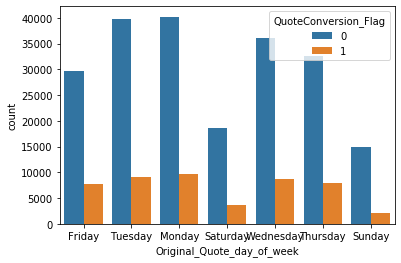

In [39]:
feature_plot(train,'Original_Quote_day_of_week')  # slight impact on target # Original_Quote_Date to drop

In [41]:
feature_overview(train,'QuoteNumber') # Unique values == rows, this is an id, to drop
train.drop('QuoteNumber',axis=1,inplace=True)

Missing values count: 0
Missing rate: 0.0
Unique values: 260753
4094      1
24921     1
127339    1
129386    1
123241    1
Name: QuoteNumber, dtype: int64
Mean: 217201.2460105924
Std: 125478.52263343293
Min: 1
Max: 434588


In [42]:
feature_overview(train,'SalesField8')

Missing values count: 0
Missing rate: 0.0
Unique values: 61530
36088    19
2879     19
39076    19
64578    18
64197    18
Name: SalesField8, dtype: int64
Mean: 33734.85831419006
Std: 19444.146851238515
Min: 1
Max: 67164


Skewness:-0.01


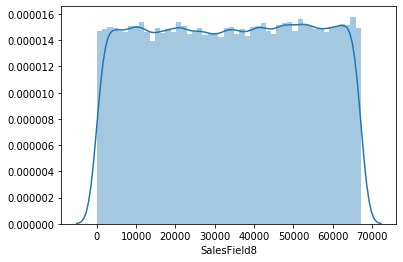

In [43]:
feature_plot(train,'SalesField8') 
# close to uniform distribution 
# in fact it is a categorical feature
# to many classes, to drop

In [52]:
feature_overview(train,'PersonalField84')

Data type: float64
Missing values count: 124208
Missing rate: 0.47634351282631454
Unique values: 7
2.0    134906
NaN    124208
1.0      1564
5.0        62
3.0         7
Name: PersonalField84, dtype: int64
Mean: 1.990142443882969
Std: 0.12793117450534922
Min: 1.0
Max: 8.0


In [53]:
train['PersonalField84'].fillna(999, inplace=True)

In [54]:
feature_overview(train,'PersonalField84')

Data type: float64
Missing values count: 0
Missing rate: 0.0
Unique values: 8
2.0      134906
999.0    124208
1.0        1564
5.0          62
3.0           7
Name: PersonalField84, dtype: int64
Mean: 476.9093203146273
Std: 497.94762359849744
Min: 1.0
Max: 999.0
